<img src="https://cdn1.dotesports.com/wp-content/uploads/sites/4/2020/04/10131342/mlb-bamtech-league-of-legends-esports.jpg" alt="League of Legends  illustration"/>

# **League of Legends Diamond Ranked Games Dataset** 
----

# Descripción  del conjunto de datos
*League of Legends* es un *MOBA (Muliplayer Online Battle Arena)*, desarrollado por *Riot Games*. De forma breve, este juego consiste en que dos equipos, el rojo y el azul, se enfrentan con el objetivo de destruir el nexo enemigo.
En el camino, deben enfrentarse a obstáculos como destruir torres que infringen daño y asesinar a los jugadores del equipo contrario. Los jugadores/equipos pueden obtener beneficios y oro completando tareas como farmear, asesinar jugadores u objetivos de la jungla. Lo anterior les permite juntar oro para comprar items que les ayudan a aumentar el poder de sus habilidades. Cada equipo está compuesto por cinco jugadores, donde cada uno cumple con un rol particular: *mid laner, top laner, ad carry, jungler y support*. 
 
Asimismo, este juego tiene un sistema de clasificación mediante ligas, en el que jugadores con un nivel de habilidad similar son agrupados. Desde la liga más baja hasta la liga más alta, las ligas son: *Iron, Bronze, Silver, Gold, Platinum, Diamond, Master y Grandmaster.* En primera instancia, el jugador participa de 10 partidas clasificatorias de posicionamiento, que lo ubican en una liga inicial y, partiendo de ahí, puede seguir jugando partidas clasificatorias para subir de liga. Estas partidas duran, en promedio, de 20 a 45 minutos.
 
Este conjunto de datos contiene observaciones de 9789 partidas clasificatorias de la liga *Diamond*, donde las variables de entrada corresponden con las estadísticas del juego, tomadas pasados los primeros 10 minutos de cada partida; y la variable de salida indica si el equipo azul ganó o perdió.

# Descripción  de las variables
Este conjunto de datos consta de 39 variables de entrada que corresponden con las estadísticas de juego del equipo azul y el equipo rojo, tomadas después de los primeros 10 minutos de partida; y 1 variable de salida que indica si el equipo azul ganó o perdió, visto de otra manera, si el equipo azul ganó o el rojo ganó. En el siguiente enlace se encuentra el conjunto de datos y una descripción de cada una de sus variables:

https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

# Enfoque de análisis
Dadas las estadísticas de los primeros 10 minutos de juego del equipo rojo y azul, se desea determinar cuál equipo va ganar la partida. Para lograr esto, se van a construir dos modelos de clasificación, uno utilizando  *Extreme Gradient Boosting* y otro utilizando *Logistic Regression*.





# **Generalidades del conjunto de datos**
---



In [ ]:
from pandas import read_csv
from google.colab import drive

In [ ]:
# Upload the dataset to your Google Drive account and modify this path.
drive.mount("/content/gdrive")
path = "/content/gdrive/MyDrive/AVGD/high_diamond_ranked_10min.csv"
df = read_csv(path)

Mounted at /content/gdrive


In [ ]:
# The response variable column (blueWins) is placed at the end of the dataframe.
df =  df[ ['gameId', 'blueWardsPlaced', 'blueWardsDestroyed',
        'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
        'blueEliteMonsters', 'blueDragons', 'blueHeralds',
        'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
        'blueTotalExperience', 'blueTotalMinionsKilled',
        'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
        'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
        'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
        'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
        'redTotalGold', 'redAvgLevel', 'redTotalExperience',
        'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
        'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'blueWins'] ]

In [ ]:
df.head()

,gameId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blueWins
0,4519157822,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7,0
1,4523371949,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0,0
2,4521474530,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5,0
3,4524384067,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8,0
4,4436033771,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

In [ ]:
df.describe()

,gameId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blueWins
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140,0.499038
std,2.757328e+07,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841,0.500024
min,4.295358e+09,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000,0.000000
25%,4.483301e+09,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000,0.000000
50%,4.510920e+09,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000,0.000000
75%,4.521733e+09,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000,1.000000
max,4.527991e+09,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000,1.000000


In [ ]:
df.nunique()

gameId                          9879
blueWardsPlaced                  147
blueWardsDestroyed                27
blueFirstBlood                     2
blueKills                         21
blueDeaths                        21
blueAssists                       30
blueEliteMonsters                  3
blueDragons                        2
blueHeralds                        2
blueTowersDestroyed                5
blueTotalGold                   4739
blueAvgLevel                      17
blueTotalExperience             4143
blueTotalMinionsKilled           148
blueTotalJungleMinionsKilled      74
blueGoldDiff                    6047
blueExperienceDiff              5356
blueCSPerMin                     148
blueGoldPerMin                  4739
redWardsPlaced                   151
redWardsDestroyed                 25
redFirstBlood                      2
redKills                          21
redDeaths                         21
redAssists                        28
redEliteMonsters                   3
r

In [ ]:
df.drop(["gameId"], axis='columns', inplace=True)

# **Limpieza del conjunto de datos**
Como se observa en el siguiente gráfico, ningún atributo tiene valores faltantes. Además, en una revisión previa hecha con *Open Refine*, se observó que los valores que toma cada atributo tienen sentido en el contexto del juego y son consistentes a lo largo del conjunto de datos, por lo que no hubo que hacer tareas de limpieza.

In [ ]:
import missingno as msno

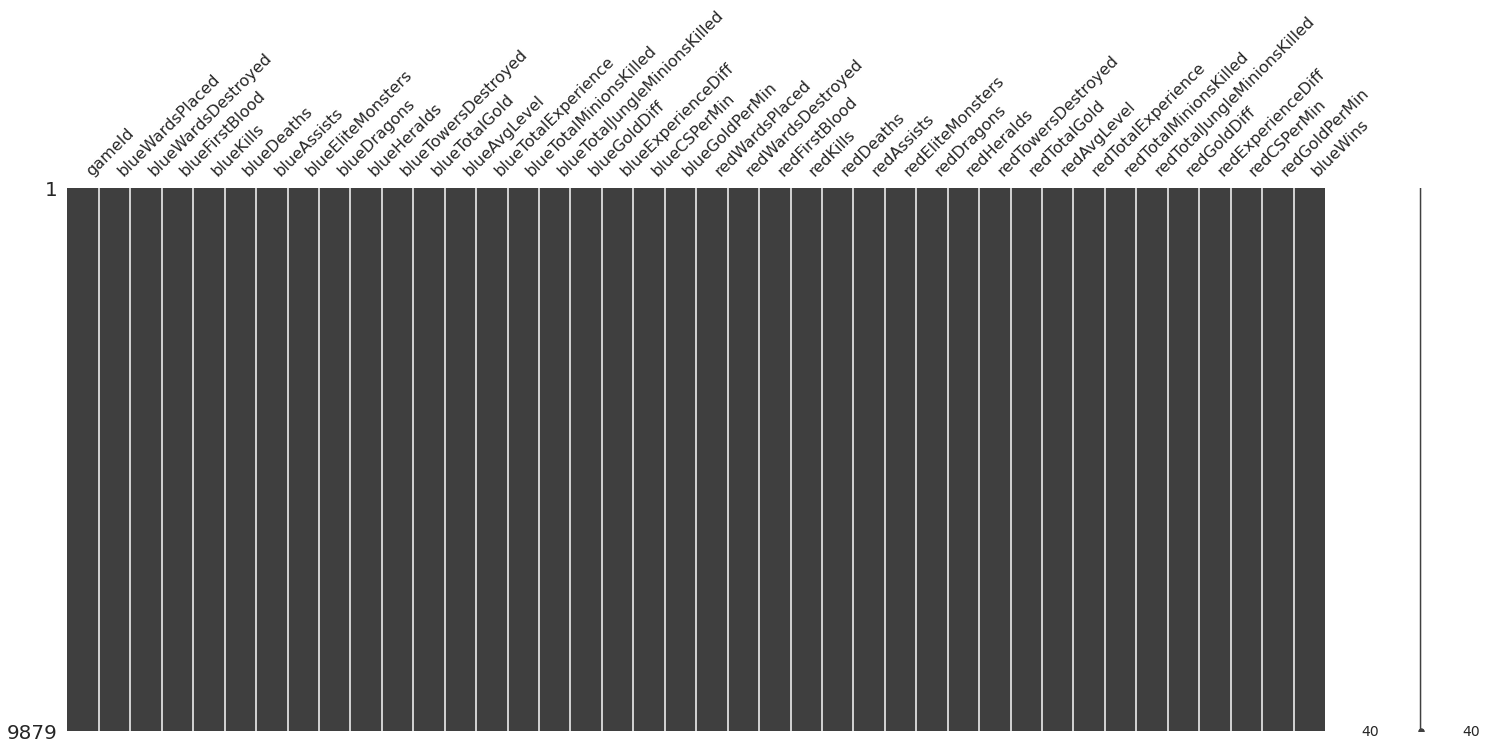

In [ ]:
msno.matrix(df);

# **Visualización del conjunto de datos**
---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## **Frecuencia de victoria de acuerdo con el equipo**
Cada equipo es colocado en un extremo del mapa, al equipo rojo le corresponde el extremo derecho y al equipo azul el extremo izquierdo. Algunos jugadores argumentan que tener una perspectiva particular del mapa tiene un impacto en la posibilidad de ganar, sin embargo, como se muestra en el siguiente gráfico, ambos equipos tienen una frecuencia de victoria muy similar en el conjunto de datos utilizado.


Text(0, 0.5, 'Frequency')

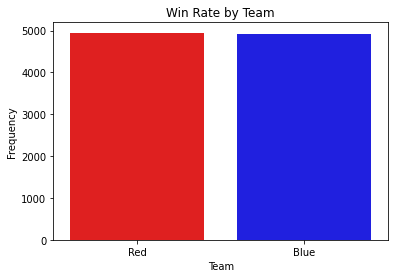

In [ ]:
plot = sns.countplot(x="blueWins", data=df, palette=['red', 'blue'])
plot.set_title('Win Rate by Team')
plot.set_xlabel('Team')
plot.set_xticks([0,1])
plot.set_xticklabels(['Red', 'Blue'])
plot.set_ylabel('Frequency')

## **Tasa de victorias de acuerdo con la tasa de *KDA***

El *KDA (Kills/ Deaths/ Assists)* indica la cantidad total de asesinatos, muertes y asistencias de un equipo. Este puede ser representado como una tasa al aplicar la siguiente fórmula: *(Kills + Assists) / Deaths*

El siguiente gráfico muestra la tasa de KDA en partidas en las que el equipo azul ganó. Como se observa, conforme aumenta la proporción de KDA del equipo azul, la probabilidad de que el equipo rojo gane disminuye. Además, se puede observar que la tasa de KDA más frecuente en la liga Diamond, durante lo primeros 10 minutos de partida, se encuentra en el intervarlo 0.0 a 5.0.


Text(0.5, 1.0, 'Win Rate by KDA Ratio')

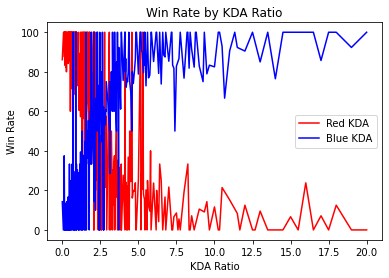

In [ ]:
# KDA = (Kills + Assists) / Deaths
df['redKDA'] = ((df['redKills'] + df['redAssists']) / df['redDeaths'])
df['blueKDA'] = ((df['blueKills'] + df['blueAssists']) / df['blueDeaths'])

# Extract KDAs less than or equal to 20%, as they are the most common, and divide them by team.
df_redKDA = df[(df['redKDA'] <= 20)].groupby(by=['redKDA'])
df_blueKDA = df[(df['blueKDA'] <= 20)].groupby(by=['blueKDA'])

# Calculate probability of winning according to KDA
# Frequency of winning according to KDA / Frequency for each KDA * 100
redKDA_rate = (df_redKDA.blueWins.sum() / df_redKDA.blueWins.count() * 100)
blueKDA_rate = (df_blueKDA.blueWins.sum() / df_blueKDA.blueWins.count() * 100)

plot = sns.lineplot(data=redKDA_rate, label='Red KDA', color='red')
sns.lineplot(data=blueKDA_rate, label='Blue KDA', color='blue')
plot.set_xlabel('KDA Ratio')
plot.set_ylabel('Win Rate')
plot.set_title('Win Rate by KDA Ratio')

## **Frecuencia de victoria de acuerdo con la cantidad de objetivos de la jungla eliminados**
Al eliminar objetivos de la jungla, tales como dragones y heraldos, los jugadores de un equipo obtienen ventajas como incrementos en la cantidad de daño, armadura, regeneración de vida, velocidad de movimiento, entre otros. Lo anterior puede impactar en la posibilidad de victoria del equipo.

De acuerdo con los datos de la tabla generada y el respectivo gráfico, se puede obtener un indicio de que:

*   Cuando en los primeros 10 minutos no se eliminó ningún objetivo de la jungla, aproximadamente, el 40% de las veces el equipo azul gana.
*   Cuando en los primeros 10 minutos se eliminó un heraldo, aproximadamente, el 50% de las veces el equipo azul gana.
*   Cuando en los primeros 10 minutos se eliminó un dragón, aproximadamente, el 60% de las veces el equipo azul gana.
*   Cuando en los primeros 10 minutos se eliminó un heraldo y un dragón, aproximadamente, el 70% de las veces el equipo azul gana.

blueWins                                   False  True 
blueEliteMonsters blueDragons blueHeralds              
0                 0           0             3101   2055
1                 0           1              564    583
                  1           0             1096   1770
2                 1           1              188    522

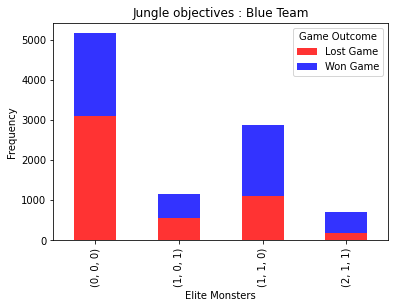

In [ ]:
pd_blue = pd.crosstab( [df['blueEliteMonsters'],df['blueDragons'],df['blueHeralds']], df.blueWins.astype(bool)  )
plt_blue = pd_blue.plot(kind='bar', stacked=True, label='Game Outcome', color=['red', 'blue'], alpha=0.8)
plt_blue.set_xlabel('Elite Monsters')
plt_blue.set_ylabel('Frequency')
plt_blue.set_title('Jungle objectives : Blue Team')
plt_blue.legend(["Lost Game", "Won Game"], title="Game Outcome")

pd_blue

##**Atributos correlacionados con la victoria**
A continuación se presenta la matriz de correlación mediante un mapa de calor, a partir del cual se puede observar que los atributos más correlacionados con la victoria (*blueWins*) son:
- *blueKills*
- *blueTotalGold*
- *blueAvgLevel*
- *blueTotalExperience*
- *blueGoldDiff*
- *blueExperienceDiff*
- *blueGoldPerMin*
- *redDeaths*
- *blueKDA*

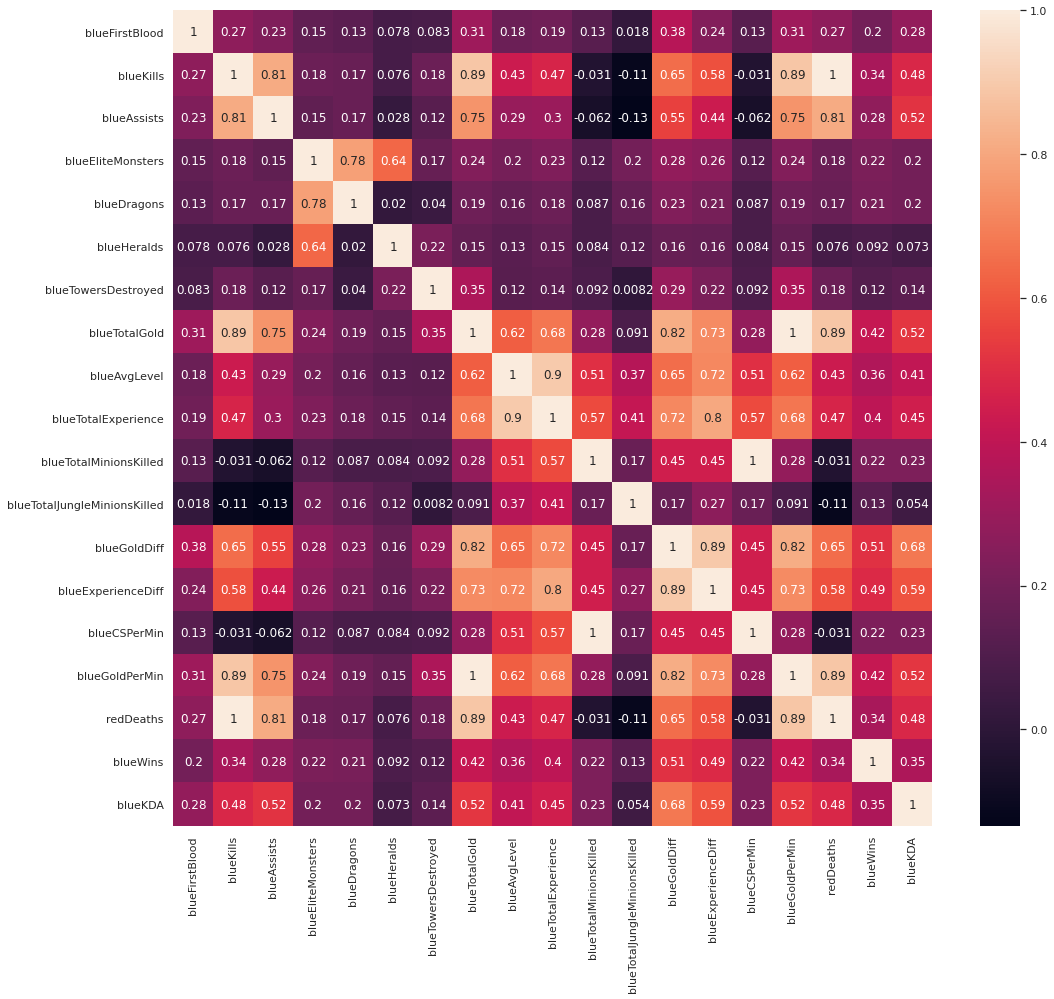

In [ ]:
blue_col = df.corr()[df.corr()['blueWins'] >= 0.07].index.values
heatmap = sns.set(style="darkgrid", palette="colorblind")

plt.subplots(figsize=(17,15))
plt.pcolor(df[blue_col].corr())
plt.xticks(np.arange(0, len(blue_col), 1), blue_col)
plt.yticks(np.arange(0, len(blue_col), 1), blue_col)
plt.xticks(rotation=90)
sns.heatmap(df[blue_col].corr(), cmap=heatmap, annot=True)

# **Reducción de dimensionalidad**
---
El conjunto de datos cuenta con 38 variables predictoras y 1 variable de respuesta. A continuación, se muestra la implementación de un método para reducir la dimensionalidad del conjunto de datos utilizando PCA, donde se estandarizan los datos de forma previa y se especifican 20 componentes como salida. 

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
def reduce_features(X):
  X_scaled = StandardScaler().fit_transform(X)
  X_reduced = PCA(n_components= 20).fit_transform(X_scaled)
  return X_reduced

# **Tunning de hiperparámetros y selección del mejor modelo**
Con el objetivo de determinar los mejores valores para los hiperaparámetros *batch size* y *epochs* se implementa *Greedy Search* dentro de *Nested Cross Validation* con 10 folds en el ciclo externo y 3 en el ciclo interno. Se alcanza, aproximadamente, un 73% de *accuracy*, lo cual es bastante similar a los resultados obtenidos con *Extreme Gradient Boosting* y *Logistic Regression* en la tarea pasada, sin embargo, hay que recordar que en la tarea pasada implementé de forma incorrecta el *tunning* de parámetros y evaluación de los modelos, por lo que no es una comparación objetiva.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from numpy import mean, std

In [ ]:
def get_dataset():
  features  = df.iloc[:, 0:38]
  label = df.iloc[:, 38]
  return features, label

def get_model():
  model = Sequential()
  model.add( Dense(12, input_dim= 20, activation='relu') )
  model.add( Dense(8, activation='relu') )
  model.add( Dense(1, activation='sigmoid') )
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

def run():
  # Get dataset.
  x, y = get_dataset()

  # Perform dimensionality reduction using PCA.
  x = reduce_features(x)
  
  # Accuracy list.
  acc_results = []

  cv_outer = KFold(n_splits=10)
  for train_ix, test_ix in cv_outer.split(x):
    # Split dataset.
    x_train, x_test = x[train_ix, :], x[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    
    # Define model.
    model = KerasClassifier(build_fn=get_model, verbose=0)

    # Define hyperparameter values to implement grid search.
    epochs_list = [10, 50, 100]
    batch_size_list = [64, 128, 256]
    param_grid = dict(epochs=epochs_list, batch_size=batch_size_list) 
    grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=3, cv=3)
    grid_result = grid.fit(x_train, y_train)

    # Evaluate model on the hold out dataset.
    best_model = grid_result.best_estimator_
    y_pred = best_model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_results.append(acc)

  # Summarize the estimated performance of the model.
  print(f"Accuracy: {mean(acc_results)} ({std(acc_results)})") 

run()

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=64, epochs=10, score=0.716, total=   2.6s
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV] ............ batch_size=64, epochs=10, score=0.724, total=   3.8s
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


[CV] ............ batch_size=64, epochs=10, score=0.734, total=   2.5s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.715, total=  11.1s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.715, total=  11.1s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.722, total=  11.1s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.709, total=  16.8s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.721, total=  16.9s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.721, total=  16.8s
[CV] batch_size=128, epochs=10 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  3.0min finished
/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] batch_size=64, epochs=10 ........................................
[CV] ............ batch_size=64, epochs=10, score=0.722, total=   3.5s
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV] ............ batch_size=64, epochs=10, score=0.723, total=   3.4s
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.9s remaining:    0.0s


[CV] ............ batch_size=64, epochs=10, score=0.725, total=   3.8s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.716, total=  11.1s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.711, total=  11.1s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.721, total=   8.8s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.710, total=  21.4s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.718, total=  21.3s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.722, total=  21.4s
[CV] batch_size=128, epochs=10 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  3.2min finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=64, epochs=10, score=0.722, total=   3.4s
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV] ............ batch_size=64, epochs=10, score=0.730, total=   3.4s
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.9s remaining:    0.0s


[CV] ............ batch_size=64, epochs=10, score=0.725, total=   3.4s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.717, total=  11.1s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.727, total=  11.5s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.724, total=   8.8s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.716, total=  21.4s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.722, total=  21.4s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.722, total=  16.8s
[CV] batch_size=128, epochs=10 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  3.1min finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=64, epochs=10, score=0.726, total=   3.5s
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV] ............ batch_size=64, epochs=10, score=0.729, total=   3.4s
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.0s remaining:    0.0s


[CV] ............ batch_size=64, epochs=10, score=0.733, total=   3.4s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.722, total=   8.9s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.724, total=   8.8s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.720, total=   8.9s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.719, total=  21.4s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.714, total=  21.7s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.712, total=  21.4s
[CV] batch_size=128, epochs=10 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  3.0min finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=64, epochs=10, score=0.730, total=   3.4s
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV] ............ batch_size=64, epochs=10, score=0.720, total=   2.6s
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.0s remaining:    0.0s


[CV] ............ batch_size=64, epochs=10, score=0.720, total=   3.5s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.721, total=  11.1s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.710, total=   8.7s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.721, total=   8.9s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.706, total=  21.4s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.706, total=  21.4s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.715, total=  21.4s
[CV] batch_size=128, epochs=10 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  3.1min finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=64, epochs=10, score=0.728, total=   3.5s
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV] ............ batch_size=64, epochs=10, score=0.718, total=   2.9s
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


[CV] ............ batch_size=64, epochs=10, score=0.725, total=   2.5s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.724, total=  11.1s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.720, total=  11.1s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.718, total=  11.1s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.707, total=  21.4s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.712, total=  16.6s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.715, total=  21.3s
[CV] batch_size=128, epochs=10 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  3.1min finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=64, epochs=10, score=0.730, total=   2.5s
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] ............ batch_size=64, epochs=10, score=0.720, total=   3.5s
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


[CV] ............ batch_size=64, epochs=10, score=0.730, total=   3.4s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.732, total=  11.4s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.720, total=  11.1s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.714, total=   8.7s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.717, total=  21.4s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.715, total=  21.4s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.720, total=  21.4s
[CV] batch_size=128, epochs=10 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  3.1min finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=64, epochs=10, score=0.728, total=   3.5s
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV] ............ batch_size=64, epochs=10, score=0.714, total=   3.4s
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.9s remaining:    0.0s


[CV] ............ batch_size=64, epochs=10, score=0.719, total=   3.5s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.715, total=  11.1s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.715, total=  11.1s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.709, total=   8.8s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.708, total=  21.7s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.712, total=  16.8s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.706, total=  16.7s
[CV] batch_size=128, epochs=10 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  3.0min finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=64, epochs=10, score=0.723, total=   3.5s
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV] ............ batch_size=64, epochs=10, score=0.719, total=   3.4s
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.0s remaining:    0.0s


[CV] ............ batch_size=64, epochs=10, score=0.718, total=   3.4s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.722, total=  11.1s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.717, total=   8.8s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.719, total=   8.7s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.717, total=  21.4s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.717, total=  21.4s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.714, total=  16.8s
[CV] batch_size=128, epochs=10 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  3.0min finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=64, epochs=10, score=0.722, total=   2.5s
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] ............ batch_size=64, epochs=10, score=0.716, total=   2.9s
[CV] batch_size=64, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.4s remaining:    0.0s


[CV] ............ batch_size=64, epochs=10, score=0.724, total=   2.5s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.721, total=  11.1s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.717, total=   8.8s
[CV] batch_size=64, epochs=50 ........................................
[CV] ............ batch_size=64, epochs=50, score=0.726, total=   8.9s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.716, total=  16.6s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.712, total=  16.7s
[CV] batch_size=64, epochs=100 .......................................
[CV] ........... batch_size=64, epochs=100, score=0.727, total=  21.3s
[CV] batch_size=128, epochs=10 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  2.9min finished


Accuracy: 0.724160749664669 (0.012720953723465973)


# **Referencias**
---
1. *Machine Learning Mastery*, *Principal Component Analysis for Dimensionality Reduction in Python*,  May 8, 2020. Accessed on: July 11, 2021. [Online]. Available:  https://machinelearningmastery.com/principal-components-analysis-for-dimensionality-reduction-in-python/ 
of%20the%20gradient%20boosting%20algorithm.
2. *Machine Learning Mastery*, *Your First Deep Learning Project in Python with Keras Step-By-Step*,  July 24, 2019. Accessed on: July 11, 2021. [Online]. Available:https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
3. *Machine Learning Mastery*, *Use Keras Deep Learning Models with Scikit-Learn in Python*,  Aug 27, 2020. Accessed on: July 11, 2021. [Online]. Available:https://machinelearningmastery.com/use-keras-deep-learning-models-scikit-learn-python/

